In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from modules.preprocessing import process_cleaned_files
from modules.analysis import analyze_directory, visualize_analysis


In [2]:
dibas_raw = "data/raw/dibas"
dibas_processed = "data/processed/dibas"
clinical_raw = "data/raw/clinical-pb"
clinical_processed = "data/processed/clinical-pb"

In [3]:
def clean_dir(raw_dir):
    valid_files = []
    for fname in os.listdir(raw_dir):
        fpath = os.path.join(raw_dir, fname)
        try:
            img = cv2.imread(fpath)
            if img is not None:
                valid_files.append(fname)
        except Exception:
            continue
    print(f"{raw_dir}: {len(valid_files)} valid images out of {len(os.listdir(raw_dir))}")
    return valid_files

dibas_valid = clean_dir(dibas_raw)
clinical_valid = clean_dir(clinical_raw)

data/raw/dibas: 689 valid images out of 692
data/raw/clinical-pb: 55 valid images out of 55


In [ ]:
process_cleaned_files(dibas_valid, dibas_raw, dibas_processed, save_metadata_json=True)
process_cleaned_files(clinical_valid, clinical_raw, clinical_processed, save_metadata_json=True)
print("Preprocessing and metadata export completed for both datasets.")

In [4]:
dibas_results = analyze_directory(dibas_valid, dibas_raw, dibas_processed)
clinical_results = analyze_directory(clinical_valid, clinical_raw, clinical_processed)

Dibas:


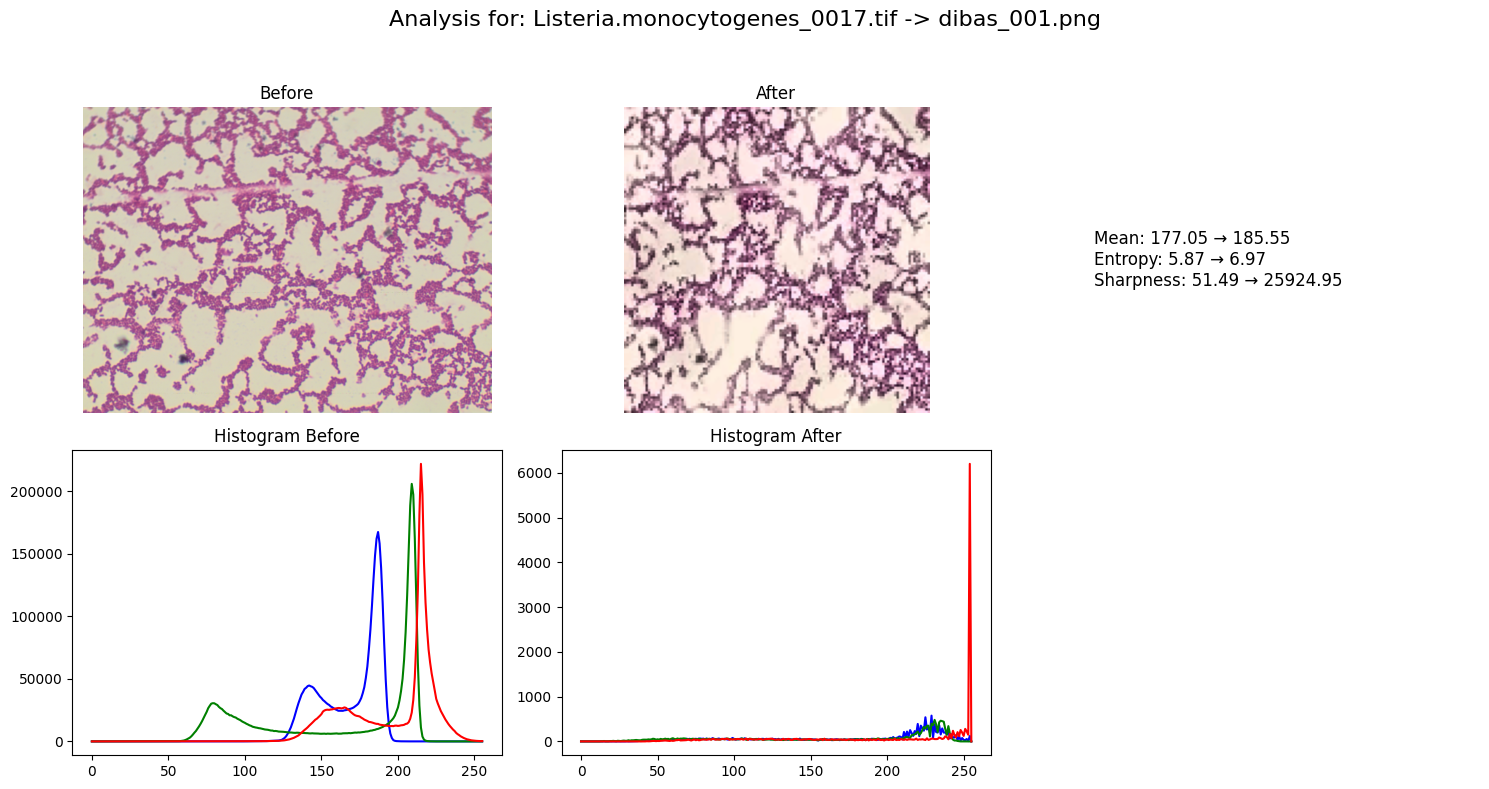

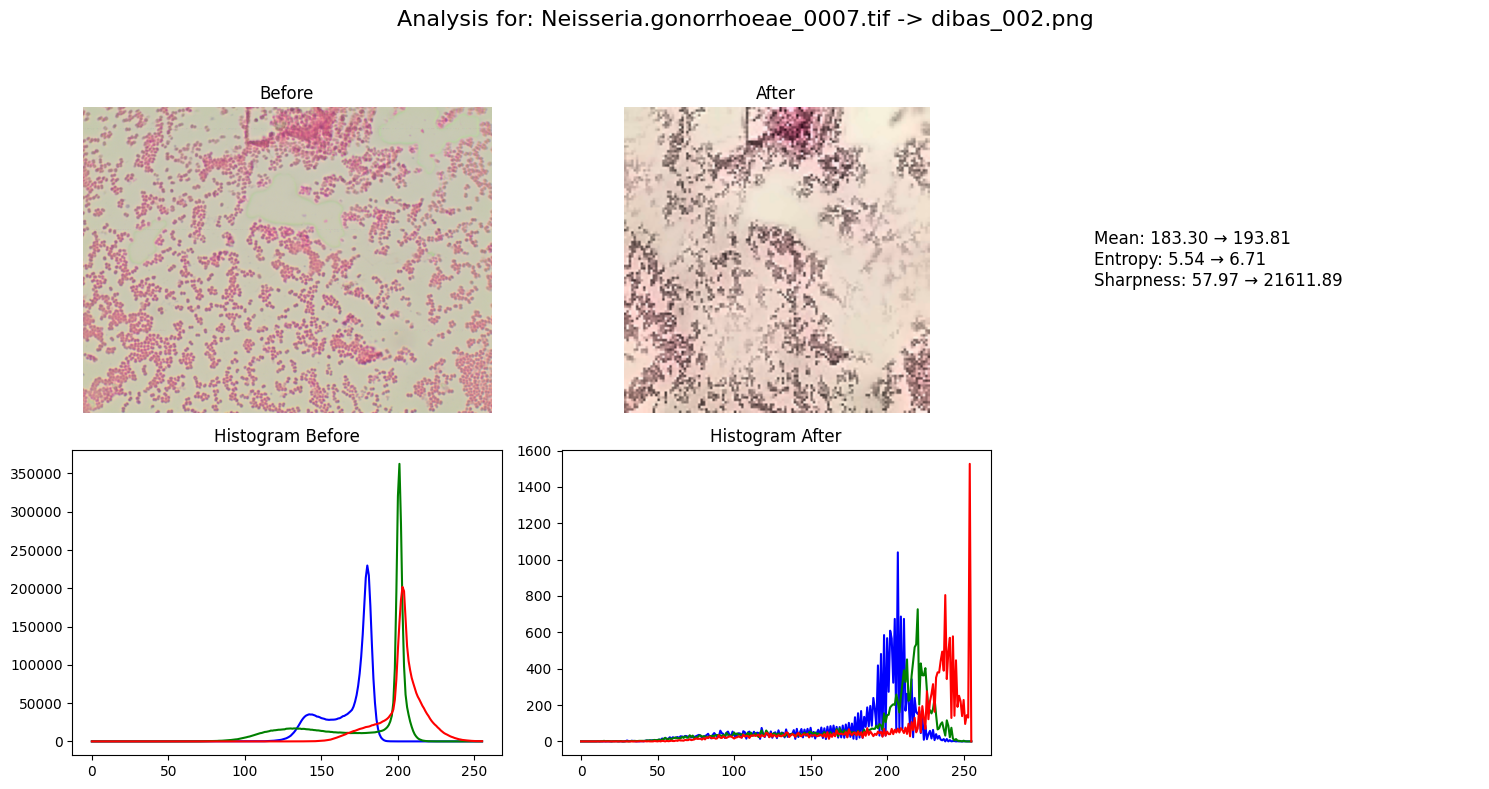

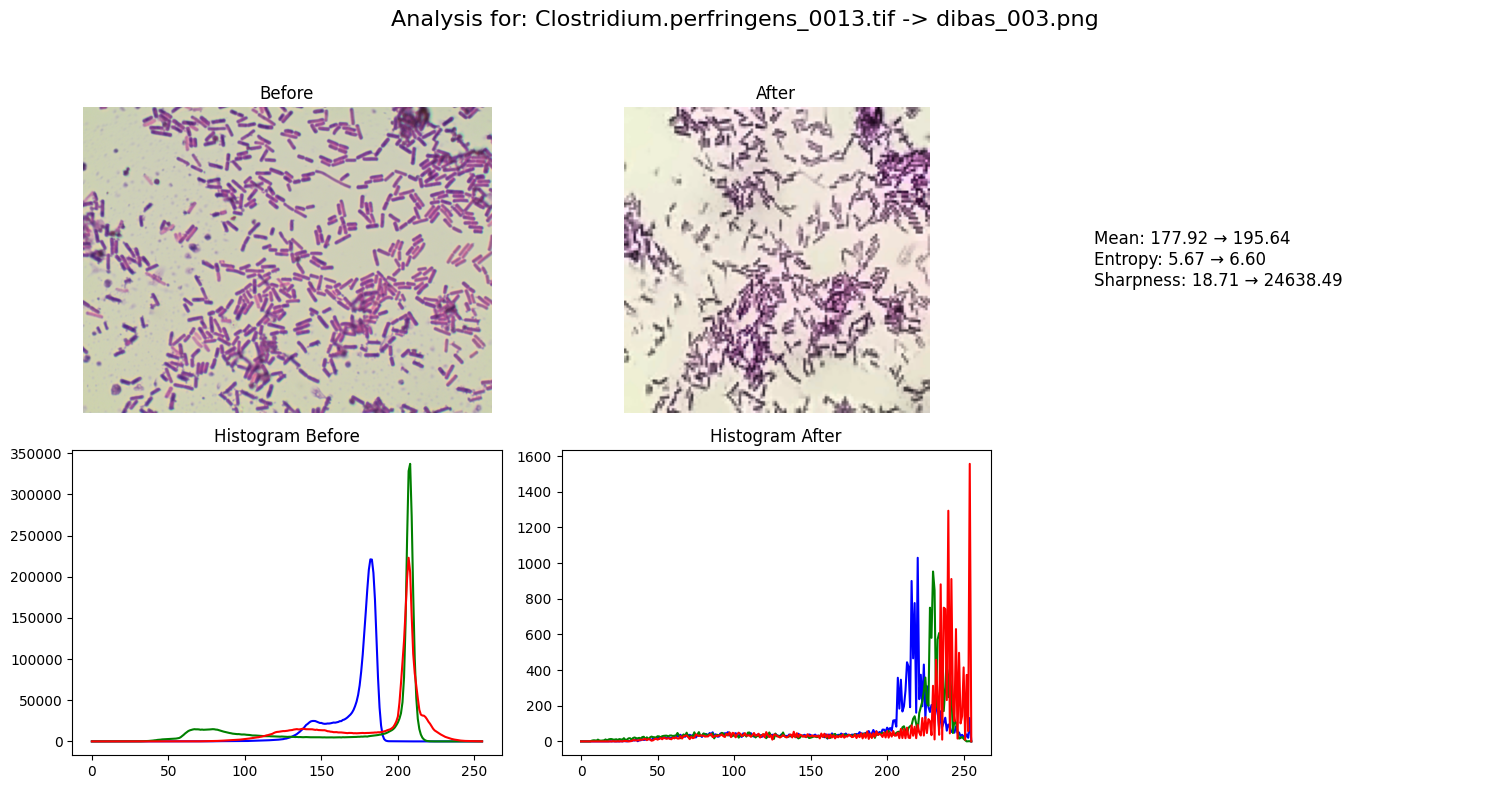

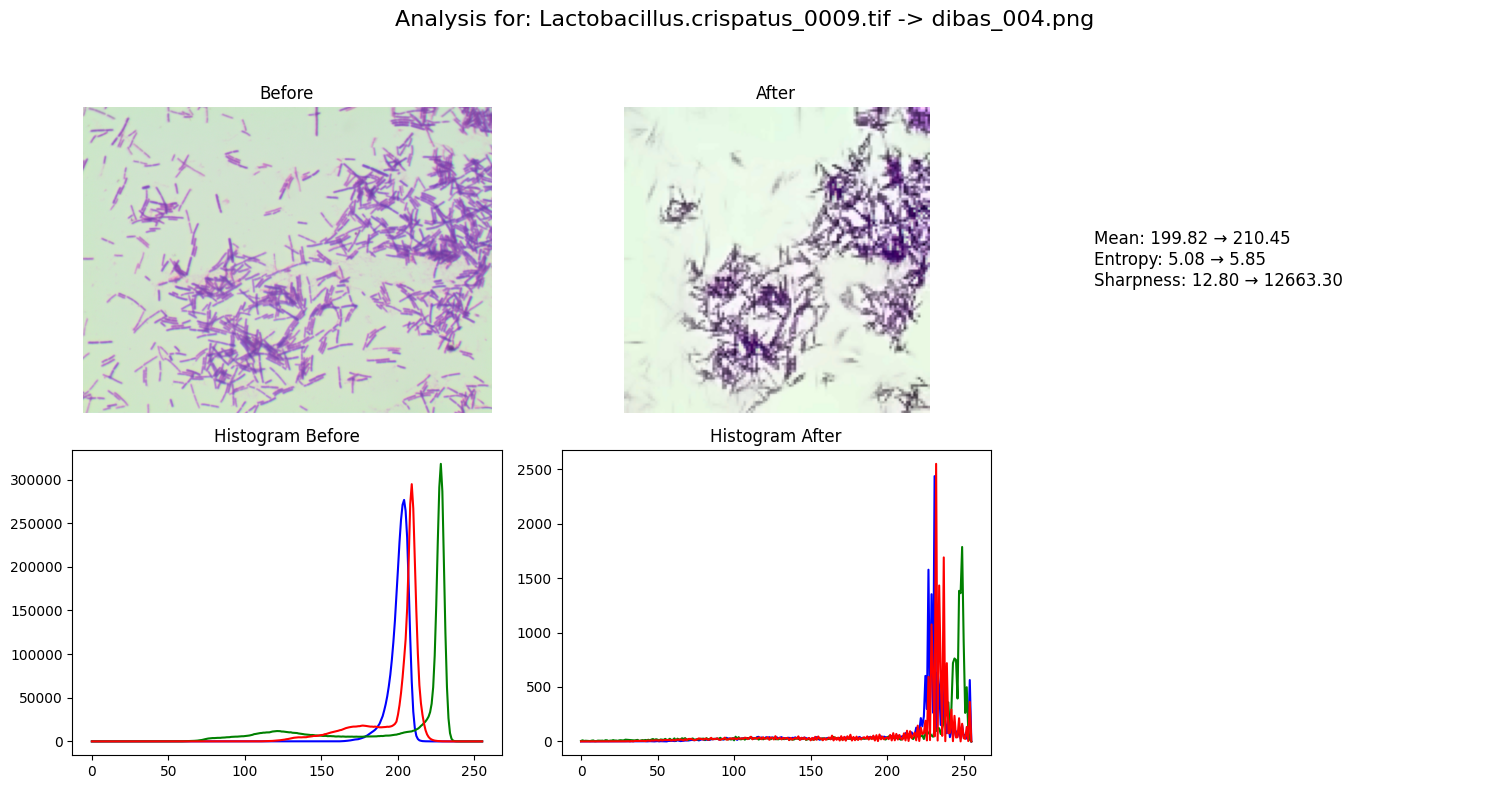

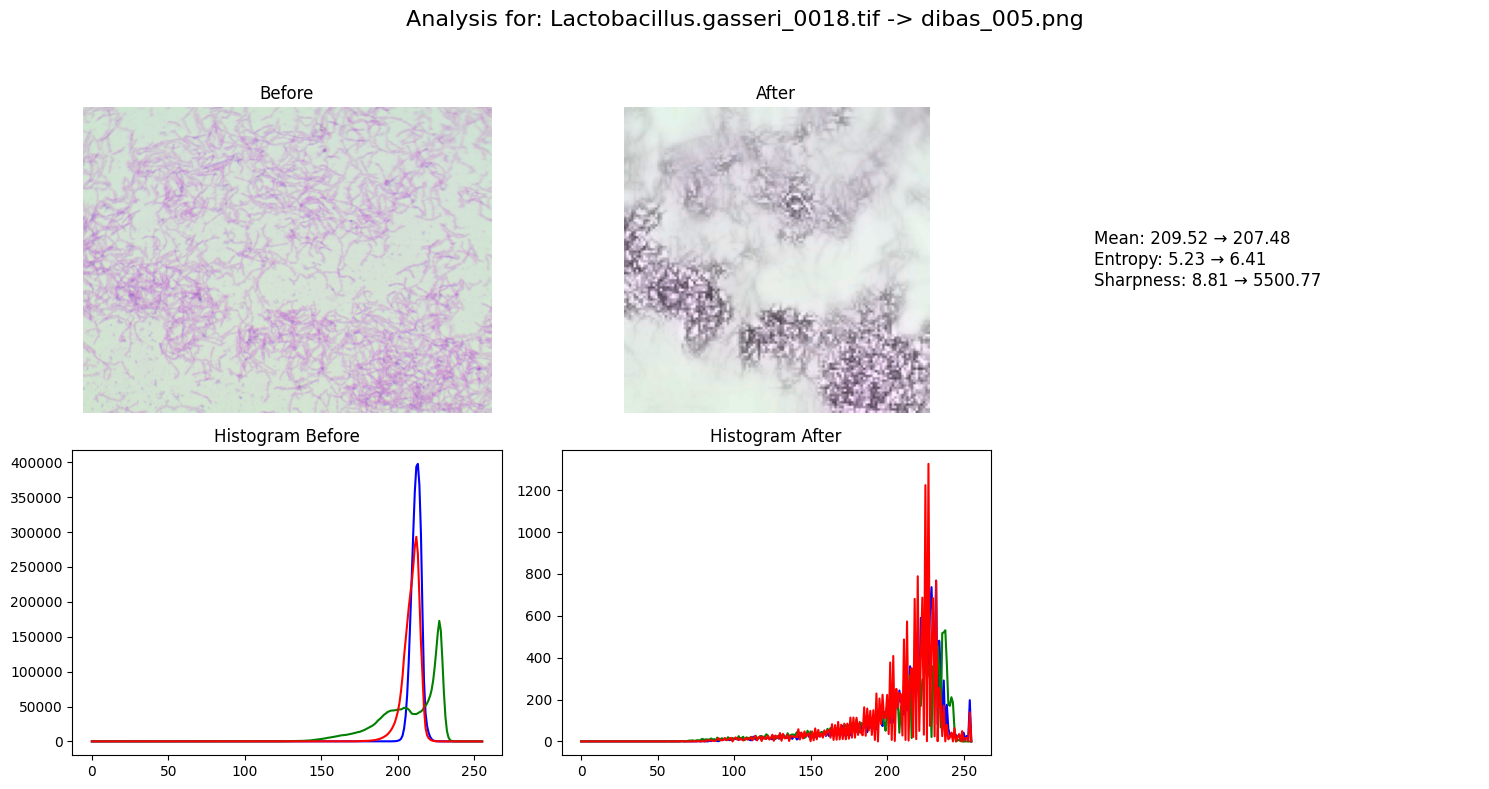

Clinical-pb:


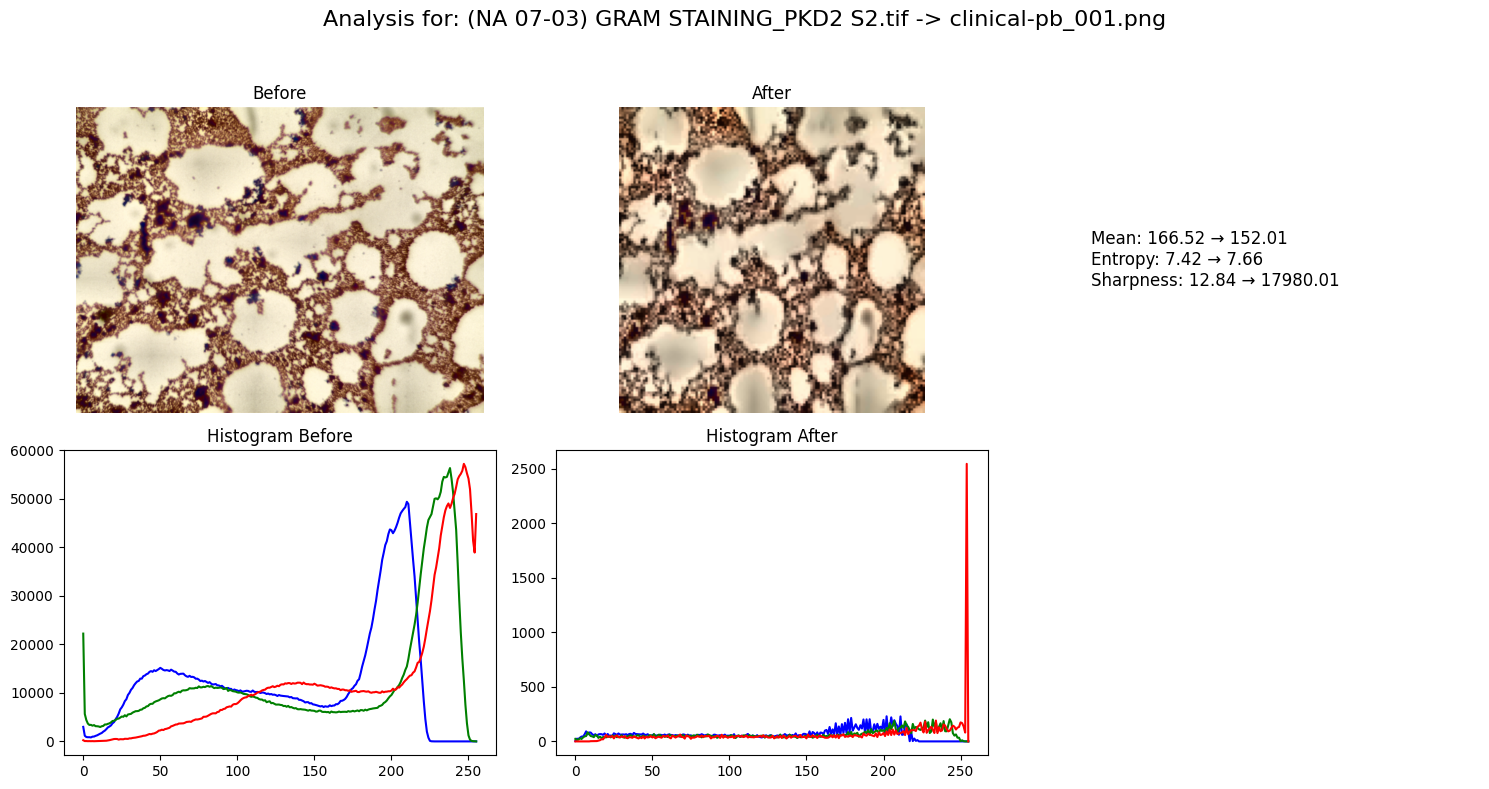

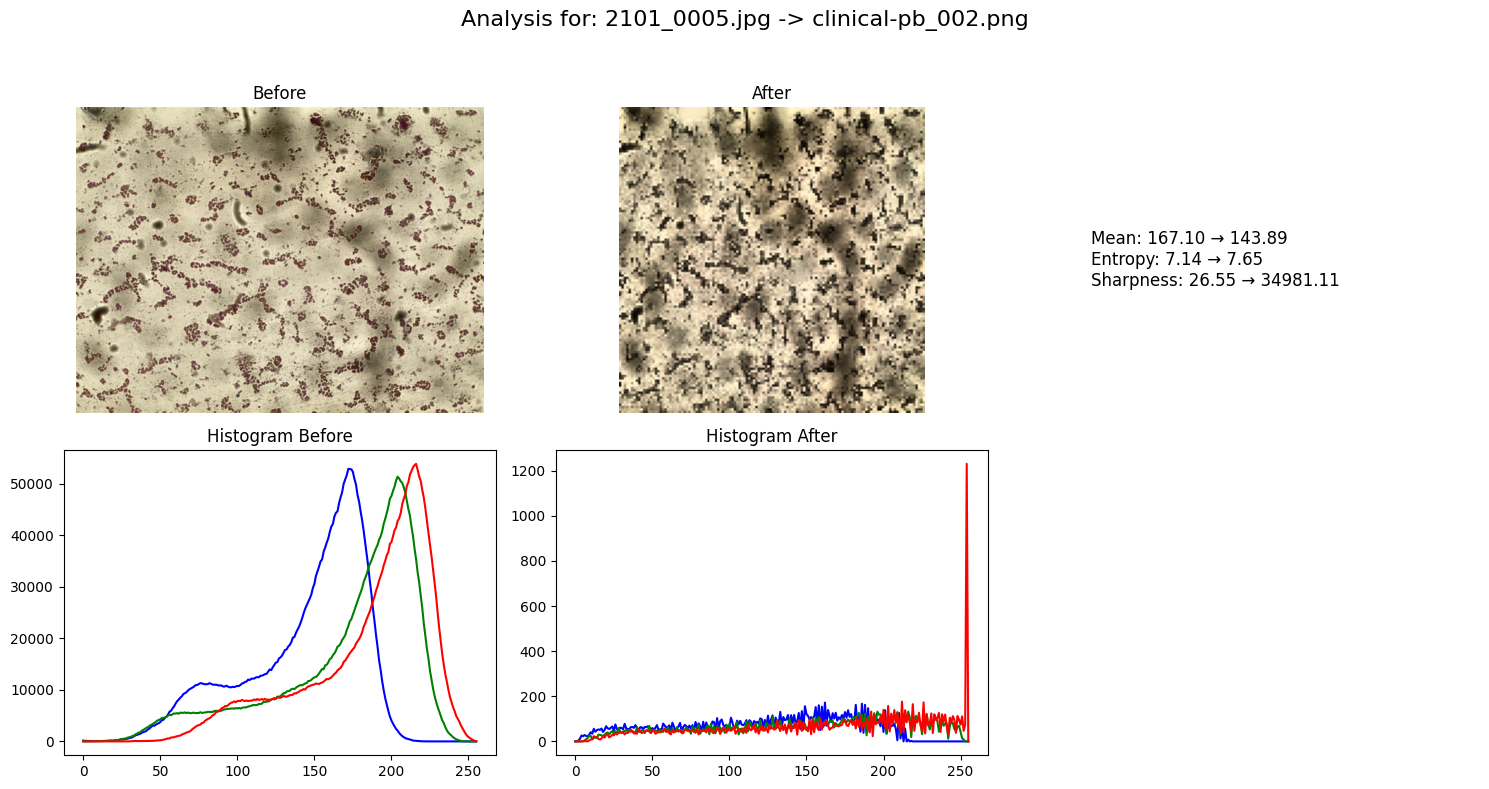

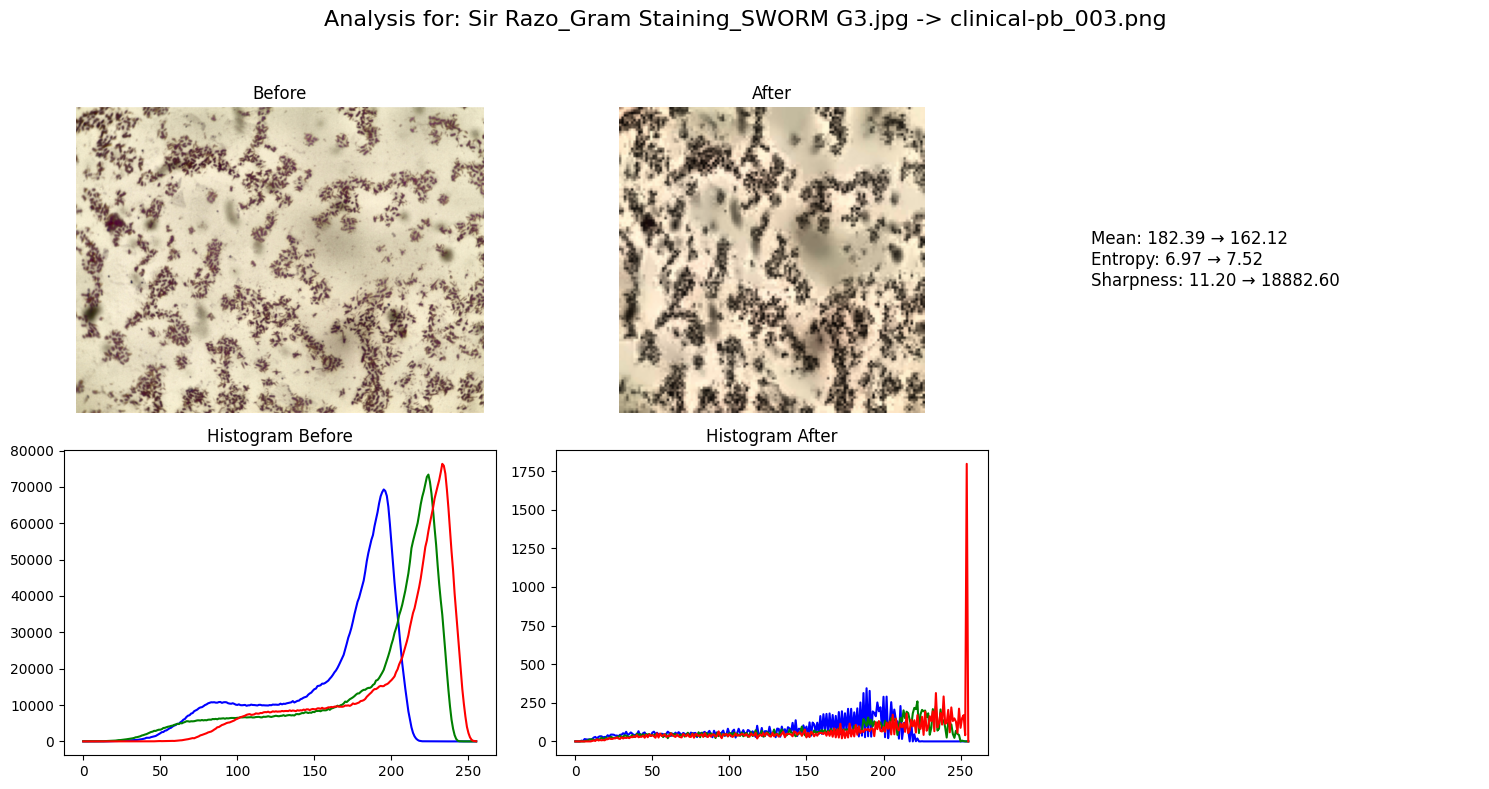

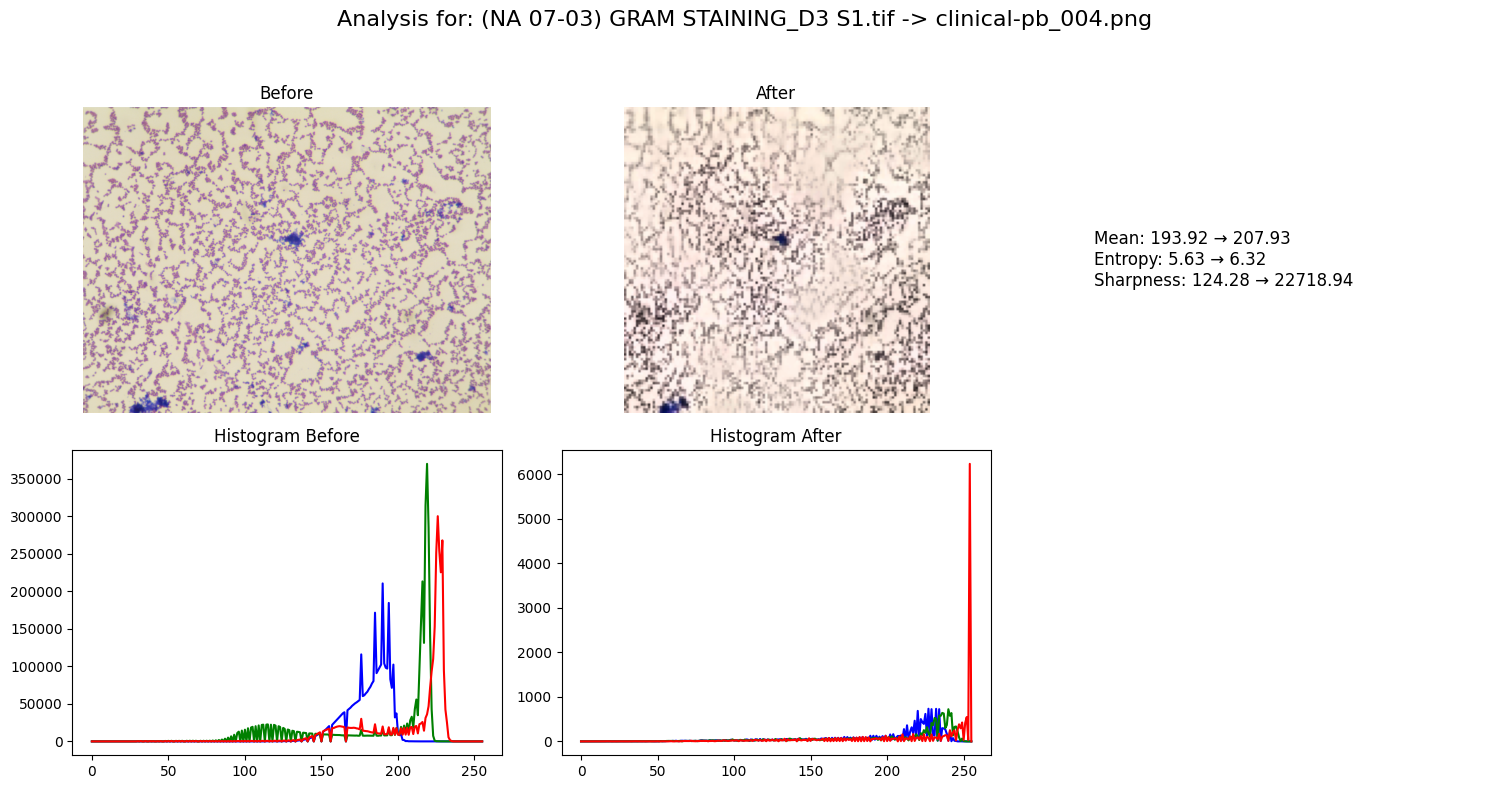

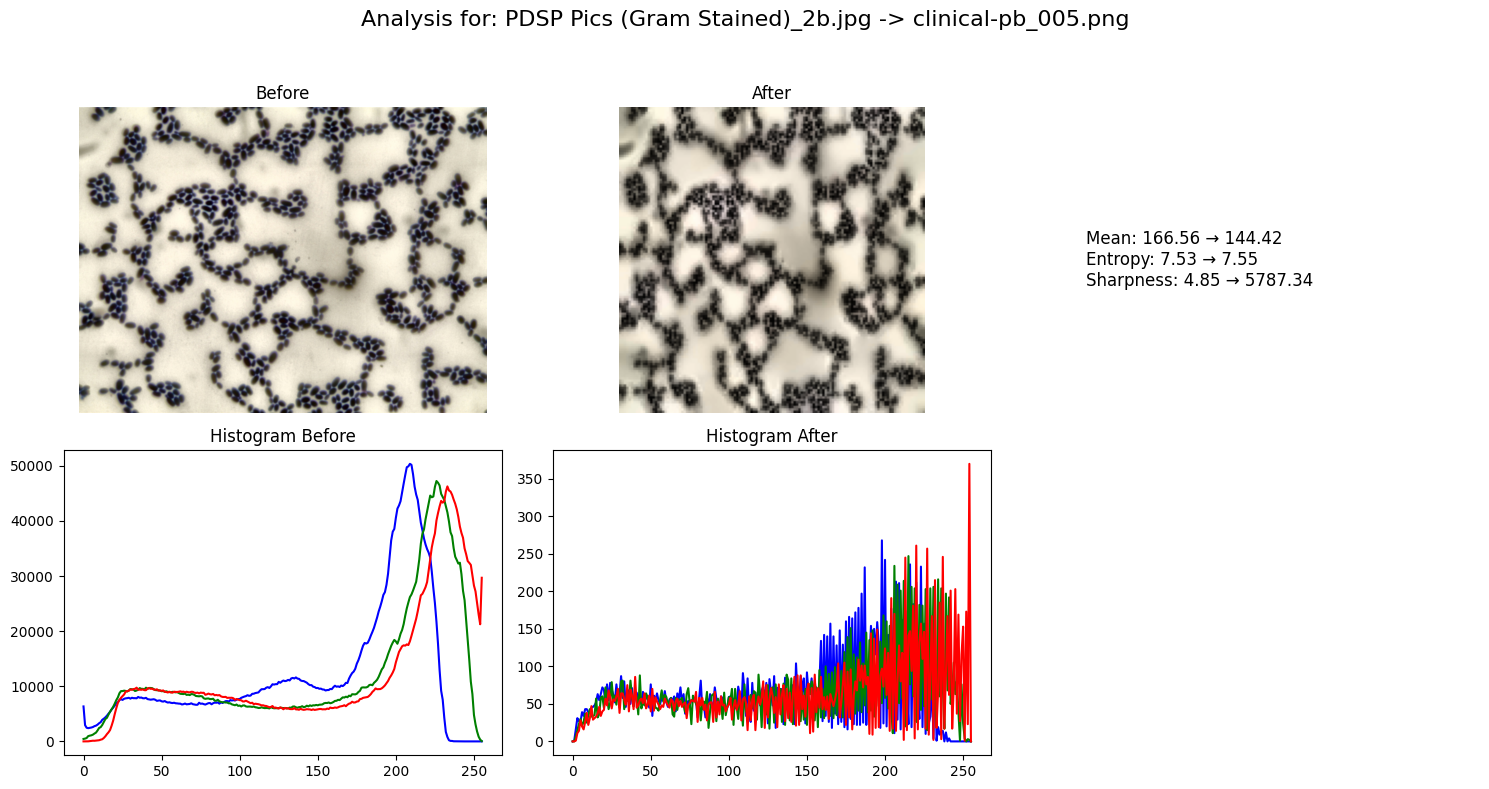

In [5]:
print("Dibas:")
visualize_analysis(dibas_results)
print("Clinical-pb:")
visualize_analysis(clinical_results)

In [6]:
def make_summary(results):
    return pd.DataFrame([{
        'before_file': r['before_file'],
        'after_file': r['after_file'],
        'mean_before': r['mean_before'],
        'mean_after': r['mean_after'],
        'entropy_before': r['entropy_before'],
        'entropy_after': r['entropy_after'],
        'sharpness_before': r['sharpness_before'],
        'sharpness_after': r['sharpness_after']
    } for r in results])

dibas_df = make_summary(dibas_results)
clinical_df = make_summary(clinical_results)
display(dibas_df.head())
display(clinical_df.head())

before_file     after_file  mean_before  mean_after  \
0   Listeria.monocytogenes_0017.tif  dibas_001.png   177.050051  185.549744   
1    Neisseria.gonorrhoeae_0007.tif  dibas_002.png   183.299751  193.808146   
2  Clostridium.perfringens_0013.tif  dibas_003.png   177.915357  195.644267   
3  Lactobacillus.crispatus_0009.tif  dibas_004.png   199.816879  210.447083   
4    Lactobacillus.gasseri_0018.tif  dibas_005.png   209.518861  207.476827   

   entropy_before  entropy_after  sharpness_before  sharpness_after  
0        5.870458       6.966544         51.490708     25924.945048  
1        5.535258       6.710270         57.970511     21611.885839  
2        5.671591       6.597143         18.710784     24638.490676  
3        5.075368       5.852859         12.802068     12663.304803  
4        5.226642       6.405556          8.810353      5500.772801

before_file           after_file  mean_before  \
0  (NA 07-03) GRAM STAINING_PKD2 S2.tif  clinical-pb_001.png   166.523764   
1                         2101_0005.jpg  clinical-pb_002.png   167.101061   
2   Sir Razo_Gram Staining_SWORM G3.jpg  clinical-pb_003.png   182.393026   
3    (NA 07-03) GRAM STAINING_D3 S1.tif  clinical-pb_004.png   193.917563   
4       PDSP Pics (Gram Stained)_2b.jpg  clinical-pb_005.png   166.558524   

   mean_after  entropy_before  entropy_after  sharpness_before  \
0  152.008057        7.424228       7.660764         12.840446   
1  143.887288        7.135193       7.650928         26.553320   
2  162.123128        6.970277       7.515362         11.203254   
3  207.931417        5.634142       6.323533        124.280317   
4  144.419698        7.529655       7.553638          4.847993   

   sharpness_after  
0     17980.012607  
1     34981.106318  
2     18882.596456  
3     22718.943025  
4      5787.340955

In [7]:
from modules.augmentation import augment_and_save

dibas_augmented = "data/augmented/dibas"
for fname in os.listdir(dibas_processed):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(dibas_processed, fname)
        image = cv2.imread(img_path)
        base_name = os.path.splitext(fname)[0]
        augment_and_save(image, dibas_augmented, base_name, n_augments=5)

clinical_augmented = "data/augmented/clinical-pb"
for fname in os.listdir(clinical_processed):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(clinical_processed, fname)
        image = cv2.imread(img_path)
        base_name = os.path.splitext(fname)[0]
        augment_and_save(image, clinical_augmented, base_name, n_augments=5)

print("Augmentation complete for both datasets.")

Augmentation complete for both datasets.


In [8]:
# Dibas
dibas_initial = len([f for f in os.listdir(dibas_processed) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
dibas_augmented = len([f for f in os.listdir("data/augmented/dibas") if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Clinical-pb
clinical_initial = len([f for f in os.listdir(clinical_processed) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
clinical_augmented = len([f for f in os.listdir("data/augmented/clinical-pb") if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

print(f"Dibas: {dibas_initial} original images, {dibas_augmented} augmented images")
print(f"Clinical-pb: {clinical_initial} original images, {clinical_augmented} augmented images")

Dibas: 689 original images, 7579 augmented images
Clinical-pb: 55 original images, 605 augmented images
